In [9]:
# This notebook plots heatmaps for mutation rate analysis

In [10]:
%pylab inline
import glob
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.ticker as ticker
import seaborn as sns
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/figure2/'

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Different colormap options: 'binary', 'hot_r', 'Blues', 'YlGnBu', 'Greens', 'viridis', 'cool'
def main():
    print('Running main')
    combos = [(4, 'intergenic')]#,(3, 'intergenic'),(4, 'intergenic'),(2, 'all'),(3, 'all'),(4, 'all')]
    superfolder = 'results_intergenic_bin_agnostic_upd'#'results_intergenic_ks_test_upd'
    colormap = 'Blues'#'hot_r'
    folders_dict = {} # Key: Tuple (Period, whether intergenic/all loci), Value: List of folders corresponding to period
    #folders_dict[(2, 'intergenic')] = ['tri1','tri2','tri3','tri4','tri5','tri6']
    #folders_dict[(3, 'intergenic')] = ['tri7','tri8','tri9','tri10']
    #folders_dict[(4, 'intergenic')] =['tri11','tri12','tri13','tri14']
    folders_dict[(2, 'intergenic')] = ['t1','t2','t3','t4','t5','t6']
    folders_dict[(3, 'intergenic')] = ['t7','t8','t9','t10','t11','t12','t13']#['t7','trial8','trial41','trial9','trial42','trial10','trial43','trial11','trial12','trial13']
    folders_dict[(4, 'intergenic')] =['t14','t15','t16','t17','t18','t19','t20']#['trial14','trial15','trial16','trial17','trial18','trial19','trial20']
    folders_dict[(2, 'all')] =['tria21','tria22','tria23','tria24','tria25','tria26']
    folders_dict[(3, 'all')] =['tria27','tria28','tria29','tria30','tria31','tria32','tria33']
    folders_dict[(4, 'all')] =['tria34','tria35','tria36','tria37','tria38','tria39','tria40']
    
    num_files_dict = {} # Key: Period, Value: Number of files
    num_files_dict[2] = 30
    num_files_dict[3] = 72
    num_files_dict[4] = 36
    
    opt_dic = {}
    opt_dic[2] = ['11','12','13','14','15','16','17','18','19','20']
    opt_dic[3] = ['05','06','07','08','09','10','11','12','13']
    opt_dic[4] = ['07','08','09','10']
    
    motif_dic = {}
    motif_dic[2] = ['AT','AG','AC']
    #motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT'] #['AAC','ACC','AGG','AAG','AAT']
    motif_dic[3] = ['AAT','ATC','AAG','AGG','AGC','CCG','AAC','ACC'] 
    #motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG'] #['AAAC','AATG','AAAT']
    motif_dic[4] = ['AAAT','AATC','AATG','ATCC','AAAG','AAGG','AGAT','AAAC','ACAT']
    
    for combo in combos:
        
        per = combo[0]
        list_of_percents = []
        list_of_num_loci = []

        # Plot heatmap for each motif in given period
        for folder in folders_dict[combo]:
            for motif in motif_dic[per]:
                for opt in opt_dic[per]:
                    file_list = glob.glob('/gymreklab-tscc/bonnieh/heatmap/%s/%s/per_%d_*%s*opt_%s.txt'%(superfolder, folder, per, motif, opt))
                    #file_list.sort() 

                    #print((motif,opt))
                    '''
                    if len(file_list) == 0:
                        print('File truncated')
                        print((folder, motif, opt))
                        list_of_percents.append(0)
                        if folder == folders_dict[combo][0]:
                            list_of_num_loci.append(0)
                    '''
                    if 1>0:
                        filename = file_list[0]
                        results_file = open(filename, 'r')
                        #lines = results_file.readlines()
                        line= results_file.readline()
                        line= results_file.readline()
                        info = line.strip().split(': ')
                        num_loci = info[1]
                        num_loci = num_loci.strip().split(' ')
                        num_loci = int(num_loci[0])
                            
                        if folder == folders_dict[combo][0]:
                                
                            list_of_num_loci.append(num_loci)
                            #print((num_loci, motif, opt))
                        if num_loci == 0:
                            #print('0 loci')
                            #print((folder, motif, opt))
                            list_of_percents.append(0)
                        
                        else:
                            for k in range(0, 8):
                                line= results_file.readline()
                            
                            info = line.strip().split(': ')
                            num_acc = int(info[1])
                            percent = num_acc 
                            list_of_percents.append(percent)
                            
                        results_file.close()
        matrix = np.zeros((len(folders_dict[combo]), num_files_dict[per]))
        #print(matrix)
        counter = 0

        for i in range(len(folders_dict[combo])):
            for j in range(num_files_dict[per]):
                #print(i,j)
                matrix[i,j] = list_of_percents[counter]
                counter = counter + 1

        # Visualize heatmap

        #print(matrix)
        if per == 2:
            settings = ["a", "b", "c", "d","e","f"] # Mutation rate settings for period 2, used to start with z and end with e
            
        else:
            settings = ['a','b','c','d','e','f','g'] #['a','b','bc','c','cd','d','de','e','f','g'] # Orig up to d, Mutation rate settings for periods 3 and 4


        opt = []
        for mot in motif_dic[per]:
            for opt_num in opt_dic[per]:
                if opt_num[0] == '0':
                    opt.append(opt_num[1]) #mot + ' ' 
                else:
                    opt.append(opt_num)

        # Plot
        
        if combo[0] == 2:
            fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,7))
        if combo[0] == 3:
            fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,7)) # 3
        if combo[0] == 4:
            fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,7)) # 5
        
        ax1 = axs[0]
        ax2 = axs[1]
        
        y_pos = list(range(0,len(list_of_num_loci)))
        ax1.bar(y_pos, list_of_num_loci)  
           
        ax1.set_ylabel("Number of loci",size=15)
        ax1.tick_params(axis="y", labelsize=15)
        #ax1.tick_params(labelsize=15)
        #ax1.set_xticks([])
        #ax1.set_title('Period %d'%(per),size=15)
        
        
        #fig = plt.figure(figsize = (15,3))
        #ax = fig.add_subplot(111)
        im = ax2.imshow(np.log10(matrix),cmap=colormap)
        #cbar = fig.colorbar(im)
        #cbar.ax.set_ylabel('Log 10 of Number of ABC Acceptances')

        # Show all ticks
        ax2.set_xticks(np.arange(len(opt)))
        ax2.set_yticks(np.arange(len(settings)))

        # Label ticks
        ax2.set_xticklabels(opt)
        ax2.set_yticklabels(settings)

        # Rotate tick labels 
        plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        plt.setp(ax2.get_yticklabels(), ha="right", rotation_mode="anchor")
        if per == 2:
            ax2.set_ylim(5.5,-0.5) # x=5.5 for period 2, x=3.5 for periods 3 and 4
        else:
            ax2.set_ylim(6.5,-0.5) # 3.5
        '''
        # Loop over data and create text annotations
        for i in range(len(settings)):
            for j in range(len(opt)):
                text = ax.text(j, i, transition_matrix[i, j],
                               ha="center", va="center", color="w")
        '''
        #ax.set_title("Dependence of ABC acceptance rates \n on mutation rates")
        if combo[0] == 2:
            ax1.set_title('Dinucleotides',fontsize=20)
        if combo[0] == 3:
            ax1.set_title('Trinucleotides',fontsize=20)
        if combo[0] == 4:
            ax1.set_title('Tetranucleotides',fontsize=20)
        
        #ax.set_xlabel('Motif and Optimal allele')
        # position x axis label
        if combo[0] == 3:
            plt.text(len(motif_dic[per])*len(opt_dic[per])/2-5,len(settings)+4, 'Motif and Optimal allele',size=15)
        else:
            plt.text(len(motif_dic[per])*len(opt_dic[per])/2-3,len(settings)+2, 'Motif and Optimal allele',size=15)
        ax2.set_ylabel('Mutation rate\nsetting',size=15)
        
        count = 0
        for motif in motif_dic[per]:
            count = count + 1
            num_opt_alleles = len(opt_dic[per])
            plt.axvline(x=count*num_opt_alleles-0.5, linestyle = '-',c='black')
            if combo[0] == 3:
                plt.text(count*num_opt_alleles-1-(num_opt_alleles/2),len(settings)+2.5,motif,size=15)
            else:
                plt.text(count*num_opt_alleles-1-(num_opt_alleles/2),len(settings)+1,motif,size=15)
        #plt.savefig(PLOTDIR + 'heatmap_%d_%s.pdf'%(per, combo[1]),bbox_inches='tight')
        plt.yticks(size=15)
        plt.xticks(size=15)
        fig.tight_layout()

Running main


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in log10


CPU times: user 285 ms, sys: 34.4 ms, total: 320 ms
Wall time: 756 ms


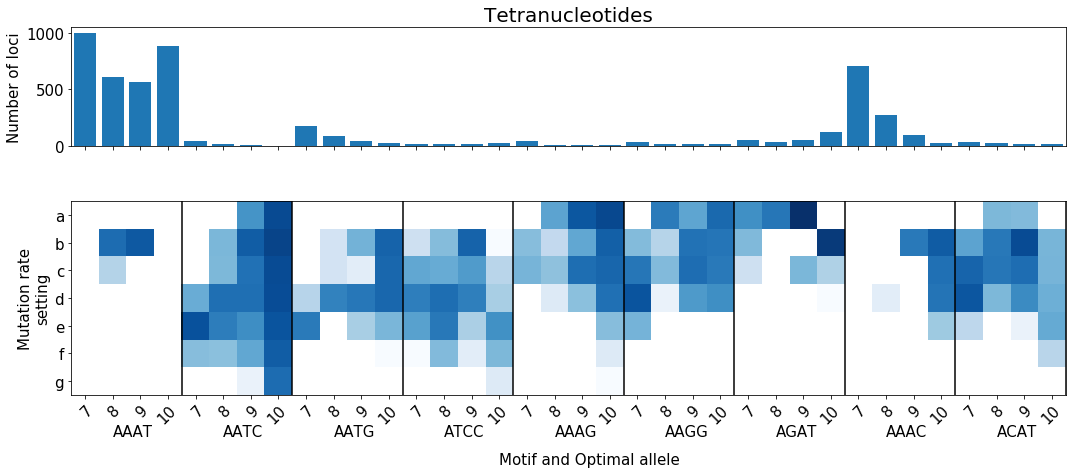

In [12]:
%%time
if __name__ == '__main__':
    main()